# PyTorch

## 1.1. O que é o PyTorch? 

It’s a Python-based scientific computing package targeted at two sets of audiences (released in January 2016):

- A replacement for NumPy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed

O Pytorch oferece uma série de recursos para criar/treinar/testar/analizar redes neurais de forma **eficiente**:
- Camadas (Embeddings, Linear, LSTM, Convolucional, MaxPooling, ...)
- Otimizadores (SGD, SGD com Momentum, RMSProp, Adam, ...)
- Funções de custo (CrossEntropy, LogLoss, LogSoftmax, ...)
- Funções de ativação (relu, tanh, sigmoid, selu, ...)
- Diferenciação automática com acumulação de gradientes
- Implementação eficiente com tensores!

Existe outros frameworks para trabalhar com redes neurais: 
- tensorflow
- mxnet
- caffee
- flux
- chainer
- keras
- dl4j
- etc
    
Cada um tem seu ponto forte. Por que escolher o PyTorch? 
- Mais intuitivo que o tf
- Grafos dinâmicos!

More info: http://pytorch.org/

## 1.2 Semelhança com o numpy

O PyTorch foi desenhado para ser *pythonico*, assim como o numpy. A estrutura base do Pytorch é um tensor, que nada mais é que um array com mais de duas dimensões. Trabalhar com as duas bibliotecas ao mesmo tempo é surpreendentemente simples.

Além disso, assim como o numpy, o PyTorch está muito mais perto de ser uma biblioteca do que um framework (tf)! 

## 1.3 Programando com tensores

Tensores são como arrays do numpy. 

Mais em: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#tensors

E tudo sobre tensores em: https://pytorch.org/docs/stable/torch.html

In [ ]:
import torch
import numpy as np

In [ ]:
# Inicializa uma matrix 5x3 vazia
x = torch.empty(5, 3)
x_numpy = np.empty((5, 3))
print(x)
print(x_numpy)

In [ ]:
# Inicializa uma matrix 5x3 aleatoriamente
x = torch.rand(5, 3)
x_numpy = np.random.random((5, 3))
print(x)
print(x_numpy)

In [ ]:
# Construct a matrix filled zeros and of dtype long:
x = torch.zeros(5, 3, dtype=torch.long)
x_numpy = np.zeros((5, 3), dtype=np.int)
print(x)
print(x_numpy)

In [ ]:
# Construct a tensor directly from data (como usando numpy):
x = torch.tensor([5.5, 3])
x_numpy = np.array([5.5, 3])
print(x)
print(x_numpy)

In [ ]:
# shape ou size
x = torch.zeros(5,3)
print(x.size())
print(x.shape)
print(x.size(1), x.shape[1])

### Podemos fazer operações

In [ ]:
y = torch.rand(5, 3)
x + y

In [ ]:
x - y

In [ ]:
x * y

In [ ]:
# Ou 
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

In [ ]:
# adds y to x inplace (observe o _ depois do add -> sempre que tiver _ no fim significa inplace)
x.add_(y)
print(x)

In [ ]:
x.t()

In [ ]:
x.t_()

In [ ]:
x.shape

In [ ]:
# Slicing como no numpy
x[:, 1]

In [ ]:
# resizing - como o np.reshape
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

In [ ]:
w = torch.randn(1)
print(w)

In [ ]:
w.item(), x[0][0], x[0][0].item()

In [ ]:
# com numpy
x_np = np.random.randn(2,2).astype('f')
x_torch = torch.randn(2,2)
print(x_np)
print(x_torch)

In [ ]:
np.add(x_np, x_torch.numpy())

In [ ]:
torch.add(torch.from_numpy(x_np), x_torch)

### E pra usar GPU?

Simples! Só mover tensores pra um dispositivo com suporte a CUDA!

In [ ]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

### Operações mais sofisticadinhas

In [ ]:
x.shape, y.shape

In [ ]:
x, y

In [ ]:
x.dot(y) # dot é para vetores, quando trabalhamos com matriz 2D+ usamos matmul

In [ ]:
x.matmul(y)

In [ ]:
# teste aqui com matrizes com mais de 2 dims

### Broadcasting

In [ ]:
m = torch.rand(5, 4)
v = torch.arange(4, dtype=torch.float)

In [ ]:
m, m.shape

In [ ]:
v, v.shape

In [ ]:
m + v

In [ ]:
v = v.view(2,2)
v, v.shape

In [ ]:
v = v.view(4,1)
v, v.shape

In [ ]:
# Note that shape [4, 1] is not broadcastable to match [5, 4]!
m + v

In [ ]:
v = v.view(1, 4)
v, v.shape

In [ ]:
m + v

### Funções úteis

In [ ]:
# !pipenv install --skip-lock matplotlib
from matplotlib import pyplot as plt

In [ ]:
!ls

In [ ]:
x = torch.arange(-10, 10, 0.1, dtype=torch.float)
x, x.shape

In [ ]:
y = x.sin()
plt.plot(x.numpy(), y.numpy(), '.')

In [ ]:
# softmax
e = torch.exp(x)
softmax = e / e.sum()
plt.plot(x.numpy(), softmax.numpy(), '.')

In [ ]:
# softmax com pytorch
y = torch.softmax(x, dim=0)
plt.plot(x.numpy(), y.numpy(), '.')

In [ ]:
# bora ver outro x
x = torch.randn([100])
x, x.shape

In [ ]:
y = torch.softmax(x, dim=0)
y

In [ ]:
plt.plot(x.numpy(), y.numpy(), '.')

In [ ]:
plt.plot(np.arange(x.shape[0]), y.numpy(), '.')

In [ ]:
torch.min(x, dim=0)

In [ ]:
torch.max(x, dim=0)

## 1.4. Autograd - diferenciação automática

O PyTorch tem um módulo chamado autograd (`torch.autograd`) que está por trás de todas as redes neurais. Ele é responsável por calcular automaticamente a derivada da função de custo em relação aos pesos e nos retornar os gradientes.

Ele realiza diferenciação automática para todas operações sobre tensores (`transpose, add, matmul`, etc). É definido no momento de execução, isso significa que o backpropagation é definido pelo modo como seu código é executado, e a cada iteração pode ser diferente.

`torch.Tensor` é a classe central do pacote.

- `x.requires_grad=True`: Mantém um histórico de operações para o tensor x.
- `x.backward()`: Quando finalizar suas operações, chama backward() e esse método vai calcular todos os gradientes
- `x.grad`: Os gradientes vão ser acumulados nesse atributo
- `x.detach()`: Tira x do grafo de computação -> faz o torch parar de manter um histórico pra esse tensor
- `x.grad_fn`: Referencia a Function que criou esse tensor
- `with torch.no_grad():` Tudo que estiver dentro do with não será mantido um histórico dos gradientes (bom para quando queremos apenas avaliar modelos)


In [159]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [162]:
x.grad, x.grad_fn

(None, None)

In [163]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)

In [164]:
y.requires_grad, y.grad, y.grad_fn

(True, None, <AddBackward at 0x7fc9245b8588>)

In [169]:
z = y * y * 3
out = z.mean()

In [170]:
z

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>)

In [171]:
out

tensor(27., grad_fn=<MeanBackward1>)

O que aconteceu aqui?

    x = 1
    y = 1 + 2 = 3
    z = 3 * 3 * 3 = 27
    out = (27+27) / 2 = 27

#### Bora ver esses gradientes

In [172]:
out.backward()

In [174]:
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

O que aconteceu aqui? Derivada parcial de `out` em relação a `x`. Tchê, derivada de x^2 = 2x, e derivada de 2x = 2, então segue o raciocínio
    
    ∂out/∂x
    out = 1/4 sum z_i
    z_i = 3 y_i^2
    y_i = x_i + 2
    ---
    ∂out/∂x = 1/4 sum 3 (x + 2)^2
            = 1/4 sum 3 * 2 (x + 2)
            = 1/4 sum 6 (x + 2) * 1
            = 3/2 sum (x + 2)
    ---
    x_i.grad = 3/2 * (x_i + 2)
             = 3/2 * (1 + 2) 
             = 3*3/2 
             = 4.5

## 1.5. Exemplo

Implementando um classificador baseado em retas (ou polinômios maiores)!

####  Linear Regression problem

The goal of linear regression is to fit a line to a set of points

In [175]:
def reta(x, a, b):
    return a*x + b

In [368]:
def gen_linear_fake_data(n, a, b, spred=3):
    x = np.random.uniform(0, 1, n) 
    y = reta(x, a, b) + 0.1 * np.random.normal(0, spred, n)
    return x, y

def gen_logistic_fake_data(n, a, b, nb_labels=2):
    x, y = gen_linear_fake_data(n, a, b, spred=10)
    z = reta(x, a, b)
    labels = y > z
    return x, y, labels

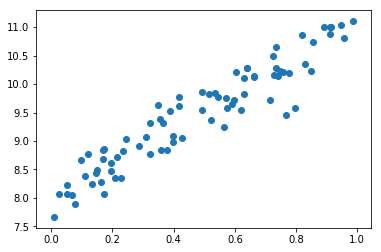

In [258]:
x, y = gen_linear_fake_data(80, 3, 8)
plt.scatter(x, y)

In [251]:
def mse(y_hat, y): 
    return np.mean(np.power(y_hat - y, 2))

In [287]:
y_hat = reta(x, 10, 6)

In [309]:
mse(y_hat, y), mse(reta(x, 3, 8), y)

(5.4626237961192405, 0.08296906895107199)

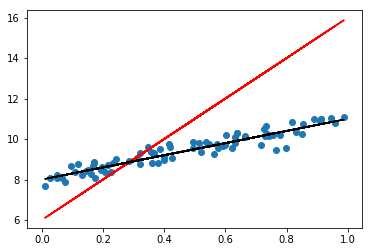

In [291]:
plt.scatter(x, y)
plt.plot(x, y_hat, '-', color='red')
plt.plot(x, reta(x, 3, 8), '-', color='black')

In [302]:
X = torch.from_numpy(x.astype('f'))
Y = torch.from_numpy(y.astype('f'))
X.requires_grad_=True
Y.requires_grad_=True

(tensor([0.1705, 0.3868, 0.7344, 0.5452, 0.6306, 0.9104, 0.7285, 0.7157, 0.5976,
         0.3220, 0.5220, 0.8306, 0.8185, 0.1188, 0.3220, 0.2269, 0.6203, 0.3486,
         0.9467, 0.7467, 0.4189, 0.6639, 0.3106, 0.0962, 0.9575, 0.3562, 0.5724,
         0.3990, 0.8902, 0.9113, 0.6394, 0.1962, 0.3991, 0.1499, 0.5754, 0.6033,
         0.0669, 0.5643, 0.1460, 0.9872, 0.2073, 0.4269, 0.1709, 0.3668, 0.7422,
         0.4160, 0.7349, 0.1625, 0.2439, 0.3792, 0.4930, 0.1940, 0.8497, 0.0102,
         0.0505, 0.1328, 0.2337, 0.6640, 0.5923, 0.2163, 0.9136, 0.6394, 0.7570,
         0.7973, 0.5355, 0.6310, 0.3595, 0.4939, 0.7259, 0.7672, 0.1100, 0.1675,
         0.7778, 0.8554, 0.0510, 0.2857, 0.5140, 0.0765, 0.1730, 0.0253]),
 tensor([ 8.8390,  9.5279, 10.6518,  9.7722,  9.8184, 10.8848, 10.1502,  9.7217,
          9.7233,  8.7718,  9.3695, 10.3570, 10.8538,  8.7770,  9.3205,  8.3534,
          9.5427,  9.6232, 11.0295, 10.2247,  9.6183, 10.1494,  9.0762,  8.6667,
         10.8135,  9.3782,  9.7466

Loss: 76.21403503417969
Loss: 46.12757110595703
Loss: 27.93123435974121
Loss: 16.926067352294922
Loss: 10.270103454589844
Loss: 6.244556427001953
Loss: 3.8098788261413574
Loss: 2.337364912033081
Loss: 1.44676673412323
Loss: 0.908112645149231
Loss: 0.6080296039581299


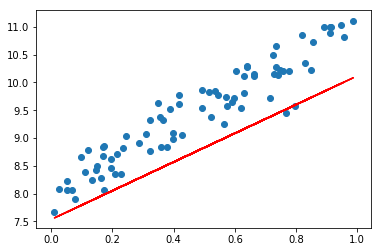

In [325]:
w_a = torch.randn(1, requires_grad=True)
w_b = torch.randn(1, requires_grad=True)
nb_epochs = 100
learning_rate = 0.01
loss_mse = lambda y_hat, y: torch.mean(torch.pow(y_hat - y, 2))
for e in range(nb_epochs):

    pred = reta(X, w_a, w_b)  # minha rede neural é uma reta! :-)
    loss = loss_mse(pred, Y)
    if e % 10 == 0:
        print('Loss: {}'.format(loss.item()))
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    w_a.data -= learning_rate * w_a.grad.data
    w_b.data -= learning_rate * w_b.grad.data
    
    # Reset the gradients
    w_a.grad.data.zero_()
    w_b.grad.data.zero_()
print('Loss: {}'.format(loss.item()))

with torch.no_grad():
    plt.scatter(x, y)
    pred = reta(X, w_a, w_b)
    plt.plot(x, pred.detach().numpy(), '-', color='red')

Tenta rodar de novo mas aumentando a taxa de aprendizado (tipo 1 ou 0.1). Tenta também aumentar o númeor de épocas!

Bora ver se essa ideia de ficar ajustando a reta funciona também pra classificação. Mas pra classificação vamos usar outra função de custo chamada de cross-entropy

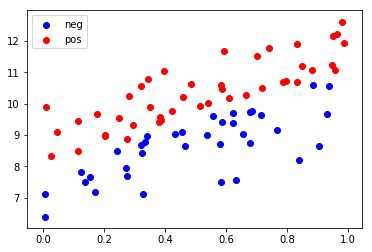

In [488]:
x, y, labels = gen_logistic_fake_data(80, 3, 8, nb_labels=2)
neg_idx = np.where(labels == 0)
pos_idx = np.where(labels == 1)
plt.scatter(x[neg_idx], y[neg_idx], c='blue', label='neg')
plt.scatter(x[pos_idx], y[pos_idx], c='red', label='pos')
plt.legend()

In [489]:
def cross_entropy(y_hat, y): 
    return (y*y_hat.log() + (1-y)*(1-y_hat).log()).mean()

def ce_numpy(y_hat, y): 
    return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)).mean()

In [490]:
y_hat = reta(x, 10, 6)

In [491]:
sigmoid = lambda y_hat: 1/(1+np.exp(y_hat))

In [492]:
mse(sigmoid(y_hat), labels), mse(sigmoid(reta(x, 3, 8)), labels)

(0.5497565177634265, 0.5498896821625046)

In [493]:
ce_numpy(sigmoid(y_hat), labels), ce_numpy(sigmoid(reta(x, 3, 8)), labels)

(6.165214366804001, 5.259598303385225)

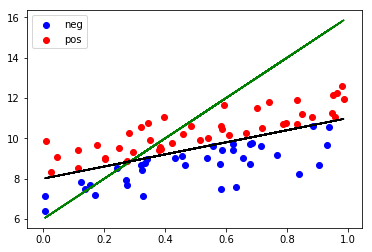

In [494]:
neg_idx = np.where(labels == 0)
pos_idx = np.where(labels == 1)
plt.scatter(x[neg_idx], y[neg_idx], c='blue', label='neg')
plt.scatter(x[pos_idx], y[pos_idx], c='red', label='pos')
plt.legend()
plt.plot(x, y_hat, '-', color='green')
plt.plot(x, reta(x, 3, 8), '-', color='black')

Loss: 115.20662689208984
Loss: 69.29312133789062
Loss: 41.90169906616211
Loss: 25.558961868286133
Loss: 15.806927680969238
Loss: 9.986383438110352
Loss: 6.511087894439697
Loss: 4.434828281402588
Loss: 3.193180561065674
Loss: 2.449460029602051
Loss: 2.0380022525787354


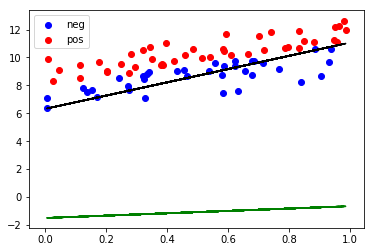

In [518]:
X = torch.from_numpy(x.astype('f'))
Y = torch.from_numpy(y.astype('f'))
L = torch.from_numpy(labels.astype('f'))
X.requires_grad_= True
Y.requires_grad_= True

neg_idx = np.where(labels == 0)
pos_idx = np.where(labels == 1)
plt.scatter(x[neg_idx], y[neg_idx], c='blue', label='neg')
plt.scatter(x[pos_idx], y[pos_idx], c='red', label='pos')
plt.legend()

w_a = torch.randn(1, requires_grad=True)
w_b = torch.randn(1, requires_grad=True)
plt.plot(x, reta(X, w_a, w_b).detach().numpy(), '-', color='green')
nb_epochs = 100
learning_rate = 0.01
loss_ce = lambda y_hat, y: -(y*y_hat.log() + (1-y)*(1-y_hat).log()).mean()

for e in range(nb_epochs):
    pred = reta(X, w_a, w_b)  # minha rede neural é uma reta! :-)
    loss = loss_mse(pred, Y)
#     pred = 1 / (1 + pred.exp())
#     loss = loss_ce(pred, L)
    
    if e % 10 == 0:
        print('Loss: {}'.format(loss.item()))
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    w_a.data -= learning_rate * w_a.grad.data
    w_b.data -= learning_rate * w_b.grad.data
    
    # Reset the gradients
    w_a.grad.data.zero_()
    w_b.grad.data.zero_()
print('Loss: {}'.format(loss.item()))

with torch.no_grad():
    pred = reta(X, w_a, w_b)
    plt.plot(x, pred.detach().numpy(), '-', color='black')